# Trajectory Analysis 

In this notebook file, we will give a detail analysis of trajectories extracted from `trajectory_construction` notebook file.

The analysis is based on two files `Melb-table1.csv` and `Melb-table2.csv`. The first file keeps the detail information about each point(photo/video) in each trajectory, and the second file keeps the detail statistics about each trajectory.

And at the end of the notebook, we will show how to generate KML data which helps to plot trajectories on various map services (e.g. Google Map), and show some example of interesting trajectories on the Google Map.

## Table of Contents

* [1. Import trajectory files using pandas library](#1.-Import-trajectory-files-using-pandas-library)
    * [1.1. Contents of trajectory table](#1.1.-Contents-of-trajectory-table)
    * [1.2. Contents of trajectory statistics table](#1.2.-Contents-of-trajectory-statistics-table)
* [2. Basic Stats](#2.-Basic-Stats)
    * [2.1. Number of users, trajectories, and average trajectories per user](#2.1.-Number-of-users,-trajectories,-and-average-trajectories-per-user)
* [3. Distributions](#3.-Distributions)
    * [3.1. Basic distribution](#3.1.-Basic-distribution)
        * [3.1.1. Bar chart: Accuracy of photos](#3.1.1.-Bar-chart:-Accuracy-of-photos)
        * [3.1.2. Histogram: Travel time](#3.1.2.-Histogram:-Travel-time)
        * [3.1.3. Histogram: Distances of trajectory](#3.1.3.-Histogram:-Distances-of-trajectory)
        * [3.1.4. Histogram: Average Speed](#3.1.4.-Histogram:-Average-Speed)    
    * [3.2. More analysis](#3.2.-More-analysis)
        * [3.2.1. Scatter plot: correlation between distance and travel time](#3.2.1.-Scatter-plot:-correlation-between-distance-and-travel-time)
        * [3.2.2. Scatter plot: correlation between distance and average speed](#3.2.2.-Scatter-plot:-correlation-between-distance-and-average-speed)
* [4. Trajectory Visualization](#4.-Trajectory-Visualization)
    * [4.1. Generating KML files with trajectory ID](#4.1.-Generating-KML-files-with-trajectory-ID)
    * [4.2. Example of interesting trajectories](#4.2.-Example-of-interesting-trajectories)

Before analyzing, we need to include some libraries.

In [1]:
%matplotlib inline

import os
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

today = pd.datetime.strftime(pd.datetime.today(),'%Y%m%d')

# 1. Import trajectory files using pandas library

[Pandas](http://pandas.pydata.org/) provide various data analysis tools. We will load two trajectory table files using Pandas library.

In [2]:
# read data and convert timestamps
data_dir = '../data/'
photo_table = os.path.join(data_dir, 'trajectory_photos.csv')
traj_table = os.path.join(data_dir, 'trajectory_stats.csv')
traj = pd.read_csv(photo_table, delimiter=',', parse_dates=[3], skipinitialspace=True)
traj_stats = pd.read_csv(traj_table, delimiter=',', parse_dates=[3], skipinitialspace=True)

## 1.1. Contents of trajectory table

The first table is coming from `Melb-table1.csv` file.

Here's five sample entries from the trajectory table. Each entry of trajectory table corresponds to single photo/video.

The table consists of following attributes(columns):

* `Trajectory_ID`: trajectory ID of entry (multiple entries belong to the same trajectory will have the same trajectory ID)
* `Photo_ID`: Unique Photo ID of entry
* `User_ID`: User ID
* `Timestamp`: Timestamp of when the photo was taken
* `Longitude`: Longitude of entry 
* `Latitude`: Latitude of entry
* `Accuracy`: GPS Accuracy level (16 - the most accurate, 1 - the least accurate)
* `Marker`: 0 if the entry is photo, 1 if the entry is video
* `URL`: flickr URL to the entry

In [3]:
traj.head()

,Trajectory_ID,Photo_ID,User_ID,Timestamp,Longitude,Latitude,Accuracy,Marker(photo=0 video=1),URL
0,7,2930292747,10058801@N06,2008-10-11 15:56:51,144.973418,-37.818564,15,0,http://www.flickr.com/photos/10058801@N06/2930...
1,7,2931152490,10058801@N06,2008-10-11 15:56:54,144.973418,-37.818564,15,0,http://www.flickr.com/photos/10058801@N06/2931...
2,7,2930292921,10058801@N06,2008-10-11 15:56:58,144.973418,-37.818564,15,0,http://www.flickr.com/photos/10058801@N06/2930...
3,7,2931152696,10058801@N06,2008-10-11 15:57:02,144.972259,-37.817971,15,0,http://www.flickr.com/photos/10058801@N06/2931...
4,7,2930293167,10058801@N06,2008-10-11 15:57:08,144.973075,-37.817302,15,0,http://www.flickr.com/photos/10058801@N06/2930...


## 1.2. Contents of trajectory statistics table

The second table is about statistics for each trajectory. Each entry of this table corresponds to single trajectory.

This table consists of following attributes(columns):

* `Trajectory_ID`: Unique trajectory ID
* `User_ID`: User ID
* `#Photo`: Number of photos in the trajectory
* `Start_Time`: When the first photo was taken
* `Travel_Distance(km)`: Sum of the distances between consecutive photos (Euclidean Distance)
* `Total_Time(min)`: The time gap between the first photo and the last photo
* `Average_Speed(km/h)`: Travel_Distances(km)/Total_Time(h)

In [4]:
traj_stats.head()

,Trajectory_ID,User_ID,#Photo,Start_Time,Travel_Distance(km),Total_Time(min),Average_Speed(km/h)
0,7,10058801@N06,19,2008-10-11 15:56:51,0.961212,71.366667,0.808119
1,10,10087938@N02,16,2008-03-13 01:35:32,0.781834,169.950000,0.276023
2,13,10087938@N02,25,2008-03-15 02:32:44,1.062079,494.133333,0.128963
3,19,10132296@N00,10,2011-08-13 03:05:24,1.223396,180.516667,0.406631
4,26,101884347@N06,5,2013-12-13 09:56:38,1.751772,489.733333,0.214619


# 2. Basic Stats

## 2.1. Number of users, trajectories, and average trajectories per user

In [5]:
num_user = traj_stats['User_ID'].unique().size
num_traj = traj_stats['Trajectory_ID'].unique().size
avg_traj_per_user = num_traj/num_user
print('# users :', num_user)
print('# trajectories :', num_traj)
print('Average trajectories per user :', avg_traj_per_user)

# users : 977
# trajectories : 4460
Average trajectories per user : 4.564994882292733


## 2.2. Min/Max/Median/Mean of each attribute

In [6]:
basic_stats = pd.DataFrame([traj_stats.min(), traj_stats.max(), traj_stats.median(), traj_stats.mean()], \
                           index=['min','max', 'median', 'mean'])
basic_stats.drop('Start_Time', axis=1, inplace=True)
basic_stats.drop('Trajectory_ID', axis=1, inplace=True)
basic_stats.drop('User_ID', axis=1, inplace=True)
basic_stats

,#Photo,Average_Speed(km/h),Total_Time(min),Travel_Distance(km)
min,2.000000,0.043375,0.001662,0.099699
max,379.000000,98.850612,1351.083333,867.034519
median,6.000000,1.340931,215.566667,4.352130
mean,13.079821,4.786399,259.316410,18.972181


# 3. Distributions

## 3.1. Basic distributions

### 3.1.1. Bar chart: Accuracy of photos

[Description about accuracy in Tumblr API](https://www.flickr.com/services/api/flickr.photos.geo.setLocation.html)

Number and % of points at max accuracy (16) 33905 0.5831011591511024
Number and % of points at accuracy >=12 56673 0.974667217005469


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3312349400>], dtype=object)

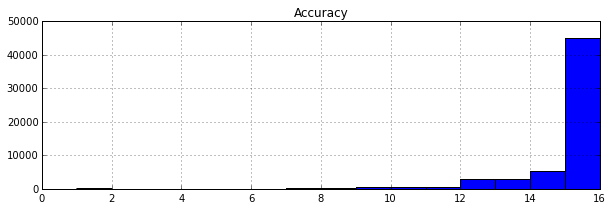

In [7]:
print("Number and % of points at max accuracy (16)", len(traj[traj['Accuracy']==16]), \
      1.*len(traj[traj['Accuracy']==16])/len(traj))
print("Number and % of points at accuracy >=12", len(traj[traj['Accuracy']>=11]), \
      1.*len(traj[traj['Accuracy']>=11])/len(traj))

ax1 = plt.figure(figsize=[10,3]).add_subplot(111)
traj.hist(column=['Accuracy'], bins=15, ax=ax1)

### 3.1.2. Histogram: Travel time

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f331210ebe0>], dtype=object)

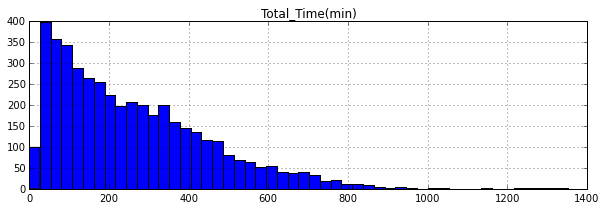

In [8]:
ax1 = plt.figure(figsize=[10,3]).add_subplot(111)
traj_stats.hist(column='Total_Time(min)', bins=50, ax=ax1)

### 3.1.3. Histogram: Distances of trajectory

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3311f81978>], dtype=object)

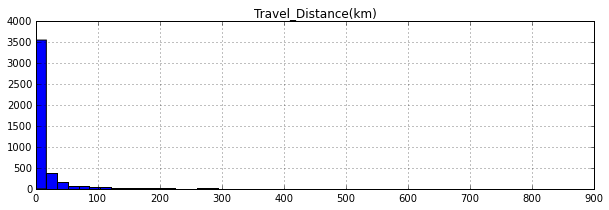

In [9]:
ax1 = plt.figure(figsize=[10,3]).add_subplot(111)
traj_stats.hist(column='Travel_Distance(km)', bins=50, ax=ax1)

### 3.1.4. Histogram: Average Speed

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3311e25e80>], dtype=object)

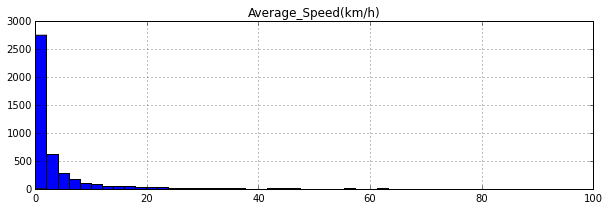

In [10]:
ax1 = plt.figure(figsize=[10,3]).add_subplot(111)
traj_stats.hist(column='Average_Speed(km/h)', bins=50, ax=ax1)

## 3.2. More analysis

### 3.2.1. Scatter plot: correlation between distance and travel time

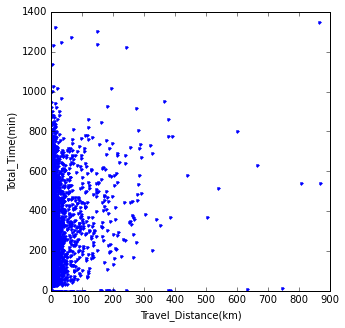

In [11]:
ax = plt.figure(figsize=[5,5]).add_subplot(111)
plt.plot(traj_stats['Travel_Distance(km)'], traj_stats['Total_Time(min)'], '.')
ax.set_xlabel('Travel_Distance(km)'); ax.set_ylabel('Total_Time(min)')

### 3.2.2. Scatter plot: correlation between distance and average speed

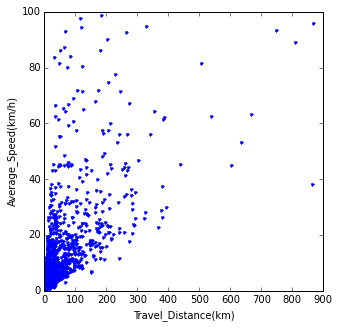

In [12]:
ax = plt.figure(figsize=[5,5]).add_subplot(111)
plt.plot(traj_stats['Travel_Distance(km)'], traj_stats['Average_Speed(km/h)'], '.')
ax.set_xlabel('Travel_Distance(km)'); ax.set_ylabel('Average_Speed(km/h)')

## 4. Trajectory Visualization

[KML file](https://en.wikipedia.org/wiki/Keyhole_Markup_Language) is a useful tool to visualize trajectories on commercial map services such as Google Map. 

In this section, we provide how to generate KML files for visualize trajectories on the map of Melbourne.

### 4.1. Generating KML files with trajectory ID

We implemented KML file generator in `traj_visualise.py` file. So let's first import that file.

In [13]:
import traj_visualise # for visualization on map

Now, we will generate the KML file of the longest trajectory in our dataset. `traj_visualise.gen_kml` function takes list of trajectories as an input and generate KML files for those trajectories.

```python
def gen_kml(fname, traj_data, traj_stats, traj_id_list, traj_name_list=None)
```

* `fname`: output file path
* `traj_data`: Trajectory table
* `traj_stats`: Trajectory stat table
* `traj_id_list`: List of trajectory IDs
* `traj_name_list`: List of names for each trajectory in `traj_id_list`

In the following, we generate a KML file for the longest distance trajectory.

In [14]:
longest_idx = traj_stats['Travel_Distance(km)'].idxmax()
longest_traj_id = traj_stats.ix[longest_idx].Trajectory_ID

output_file = '../data/longest.kml'
traj_visualise.gen_kml(output_file, traj, traj_stats, [longest_traj_id], ['longest_traj'])

### 4.2. Example of interesting trajectories

#### Longest travel distance: [Link to Google Map](https://drive.google.com/open?id=15nDAil1umZLszGL_rDlzW6TJtsE&usp=sharing)

In [15]:
traj_stats.ix[longest_idx]

Trajectory_ID                        25668
User_ID                       97867688@N00
#Photo                                 117
Start_Time             2004-11-04 19:54:08
Travel_Distance(km)               867.0345
Total_Time(min)                   541.2833
Average_Speed(km/h)               96.10876
Name: 4260, dtype: object

**Fastest trajectory**: [Link to Google Map](https://drive.google.com/open?id=1KrKPR0on5M4GySGCVX--Za2GZeU&usp=sharing)

In [16]:
fastest_idx = traj_stats['Average_Speed(km/h)'].idxmax()
fastest_traj_id = traj_stats.ix[fastest_idx].Trajectory_ID

output_file = '../data/fastest.kml'
traj_visualise.gen_kml(output_file, traj, traj_stats, [fastest_traj_id], ['fastest_traj'])
traj_stats.ix[fastest_idx]

Trajectory_ID                         7444
User_ID                       32005048@N06
#Photo                                  82
Start_Time             2011-08-24 09:53:16
Travel_Distance(km)               182.7089
Total_Time(min)                      110.9
Average_Speed(km/h)               98.85061
Name: 1199, dtype: object